In [ ]:
# Лабораторна робота №2. Аналіз даних. Бібліотека Pandas
# Байков Олександр
# Завдання 1. Аналіз даних ВВП (GDP)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re

In [11]:
# 1. Зчитування таблиці з Вікіпедії
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
headers = {"User-Agent": "Mozilla/5.0"}
resp = requests.get(url, headers=headers)
tables = pd.read_html(resp.text)



/tmp/ipython-input-1926467725.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(resp.text)


In [33]:
# 2. Перегляд перших 5 рядків (пункт 1)
print("\n=== Перші 5 рядків оригінальної таблиці ===")
display(df.head())




=== Перші 5 рядків оригінальної таблиці ===


,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,117165394.0,111326370.0,100834796.0
1,United States,30615743.0,29184890.0,27720700.0
2,China[n 1],19398577.0,18743803.0,17794782.0
3,Germany,5013574.0,4659929.0,4525704.0
4,Japan,4279828.0,4026211.0,4204495.0


In [32]:
# 3. Розмір датасету (пункт 2)
print("\nРозмір датасету (рядки, стовпці):", df.shape)



Розмір датасету (рядки, стовпці): (222, 4)


In [31]:
# 4. Визначення оптимальної кількості стовпців (пункт 3)
print("\nПоточні назви стовпців:", list(df.columns))
n_cols = df.shape[1]
print("Кількість стовпців у знайденій таблиці:", n_cols)


Поточні назви стовпців: ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']
Кількість стовпців у знайденій таблиці: 4


In [30]:
# 5. Перейменування колонок на зручні (пункт 4)
def map_col_name(col_name):
    s = str(col_name).lower()
    if "country" in s or "territory" in s:
        return "Country"
    if "imf" in s or "international monetary fund" in s:
        return "MVF_2024"
    if "world bank" in s or "worldbank" in s:
        return "WorldBank_2023"
    if "united" in s or "united nations" in s or "un" in s:
        return "OON_2022"
    if re.search(r'\b202[0-9]\b', s) or re.search(r'\b20[2-9][0-9]\b', s):
        if "world" in s:
            return "WorldBank_2023"
        if "imf" in s:
            return "MVF_2024"
        if "united" in s:
            return "OON_2022"
    return col_name


In [29]:
# 6. Визначення типів даних (пункт 5)
print("\nТипи даних до перетворення:")
print(df.dtypes)



Типи даних до перетворення:
Country            object
MVF_2024          float64
WorldBank_2023    float64
OON_2022          float64
dtype: object


In [28]:

# 7. Замініть у таблиці значення '—' на NaN і перетворіть числові колонки (пункт 6)

def to_numeric_clean(s):
    if pd.isna(s):
        return np.nan
    s = str(s)
    s = s.replace('\xa0', '').strip()
    s = re.sub(r'\[.*?\]', '', s)
    s = re.sub(r'\(.*?\)', '', s)
    s = s.replace(',', '').replace(' ', '')
    if s == '' or s in ['—', '-']:
        return np.nan
    m = re.search(r'[-+]?[0-9]*\.?[0-9]+', s)
    if m:
        try:
            return float(m.group(0))
        except:
            return np.nan
    return np.nan
for col in df.columns:
    if col == "Country":
        continue
    df[col] = df[col].apply(to_numeric_clean)

print("\nТипи даних після перетворення:")
print(df.dtypes)



Типи даних після перетворення:
Country            object
MVF_2024          float64
WorldBank_2023    float64
OON_2022          float64
dtype: object


In [35]:
#  8. Перевірка наявності пропущених значень і заповнення середнім (пункт 6 продовження)
print("\nКількість пропусків по колонках до заповнення:")
print(df.isna().sum())


Кількість пропусків по колонках до заповнення:
Country           0
MVF_2024          0
WorldBank_2023    0
OON_2022          0
dtype: int64


In [34]:
# Заповнюємо лише числові колонки середнім значенням
num_cols = [c for c in df.columns if c != "Country"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
means = df[num_cols].mean()
df[num_cols] = df[num_cols].fillna(means)

print("\nКількість пропусків по колонках після заповнення:")
print(df.isna().sum())


Кількість пропусків по колонках після заповнення:
Country           0
MVF_2024          0
WorldBank_2023    0
OON_2022          0
dtype: int64


In [37]:
# 10. Перевірка та видалення дублікатів (пункт 8)
dups = df.duplicated().sum()
print("\nКількість дублікатів у таблиці:", dups)
if dups > 0:
    df.drop_duplicates(inplace=True)
    print("Дублікти видалено.")


Кількість дублікатів у таблиці: 0


In [38]:
#  11. Вивести описову статистику describe() (пункт 9)
print("\n=== Описова статистика (describe) ===")
display(df.describe())


=== Описова статистика (describe) ===


,MVF_2024,WorldBank_2023,OON_2022
count,2.220000e+02,2.220000e+02,2.220000e+02
mean,1.187823e+06,1.053088e+06,9.665418e+05
std,8.212766e+06,7.812285e+06,7.109289e+06
min,5.800000e+01,6.200000e+01,6.800000e+01
25%,1.589575e+04,9.698750e+03,8.888000e+03
50%,7.780550e+04,4.432300e+04,4.088750e+04
75%,5.644852e+05,3.660632e+05,2.939275e+05
max,1.171654e+08,1.113264e+08,1.008348e+08


In [40]:
#  12. Обчислити різницю між MVF_2024 та WorldBank_2023 для кожної країни (пункт 10)
if 'MVF_2024' not in df.columns or 'WorldBank_2023' not in df.columns:
    raise RuntimeError("Не знайдені колонки MVF_2024 або WorldBank_2023 для обчислення різниці.")
df['Diff_MVF_WB'] = df['MVF_2024'] - df['WorldBank_2023']
df['AbsDiff_MVF_WB'] = df['Diff_MVF_WB'].abs()

In [41]:
# Країни з найбільшими абсолютними відхиленнями (топ-5)
top5_diff = df.sort_values('AbsDiff_MVF_WB', ascending=False).head(5)[['Country', 'MVF_2024', 'WorldBank_2023', 'Diff_MVF_WB', 'AbsDiff_MVF_WB']]
print("\nКраїни з найбільшим відхиленням між MVF_2024 та WorldBank_2023 (топ-5):")
display(top5_diff)



Країни з найбільшим відхиленням між MVF_2024 та WorldBank_2023 (топ-5):


,Country,MVF_2024,WorldBank_2023,Diff_MVF_WB,AbsDiff_MVF_WB
0,World,1.171654e+08,111326370.0,5.839024e+06,5.839024e+06
1,United States,3.061574e+07,29184890.0,1.430853e+06,1.430853e+06
211,Saint Martin,1.187823e+06,649.0,1.187174e+06,1.187174e+06
209,American Samoa,1.187823e+06,871.0,1.186952e+06,1.186952e+06
207,Northern Mariana Islands,1.187823e+06,1096.0,1.186727e+06,1.186727e+06


In [42]:
#  13. Обчислити кореляцію між MVF_2024, WorldBank_2023 та OON_2022 (пункт 11)
corr = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()
print("\n=== Кореляційна матриця ===")
display(corr)


=== Кореляційна матриця ===


,MVF_2024,WorldBank_2023,OON_2022
MVF_2024,1.000000,0.999043,0.999077
WorldBank_2023,0.999043,1.000000,0.999122
OON_2022,0.999077,0.999122,1.000000


In [43]:
# Визначимо пари з найвищою кореляцією (крім 1.0 на діагоналі)
corr_unstack = corr.unstack()
corr_unstack = corr_unstack[corr_unstack.index.get_level_values(0) != corr_unstack.index.get_level_values(1)]
corr_unstack = corr_unstack.sort_values(ascending=False)
print("\nПари змінних з найвищою кореляцією (в порядку спадання):")
display(corr_unstack.drop_duplicates().head(3))


Пари змінних з найвищою кореляцією (в порядку спадання):


OON_2022  WorldBank_2023    0.999122
          MVF_2024          0.999077
MVF_2024  WorldBank_2023    0.999043
dtype: float64

In [44]:
# 14. Обчислити середнє значення для кожного стовпця (пункт 12)
means = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()
print("\nСередні значення для MVF_2024, WorldBank_2023, OON_2022:")
print(means)


Середні значення для MVF_2024, WorldBank_2023, OON_2022:
MVF_2024          1.187823e+06
WorldBank_2023    1.053088e+06
OON_2022          9.665418e+05
dtype: float64


In [45]:
# Порівняння середніх між роками
print("\nЯк змінюється середнє між джерелами (MVF_2024 vs WorldBank_2023 vs OON_2022):")
for col in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    print(f"  {col}: {means[col]:.2f}")


Як змінюється середнє між джерелами (MVF_2024 vs WorldBank_2023 vs OON_2022):
  MVF_2024: 1187822.70
  WorldBank_2023: 1053087.84
  OON_2022: 966541.76


In [46]:
# 15. Обчислити стандартне відхилення для кожної країни (пункт 13)
df['std_across_years'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)
most_variable_country = df.loc[df['std_across_years'].idxmax(), 'Country']
print(f"\nКраїна з найвищою варіативністю показників між джерелами: {most_variable_country}")



Країна з найвищою варіативністю показників між джерелами: World


In [47]:
#  16. Визначення країни з найвищим та найнижчим показниками для кожного року (пункт 14)
for col in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    max_country = df.loc[df[col].idxmax(), 'Country']
    min_country = df.loc[df[col].idxmin(), 'Country']
    print(f"\n{col} — найвищий: {max_country}; найнижчий: {min_country}")


MVF_2024 — найвищий: World; найнижчий: Tuvalu

WorldBank_2023 — найвищий: World; найнижчий: Tuvalu

OON_2022 — найвищий: World; найнижчий: Tuvalu


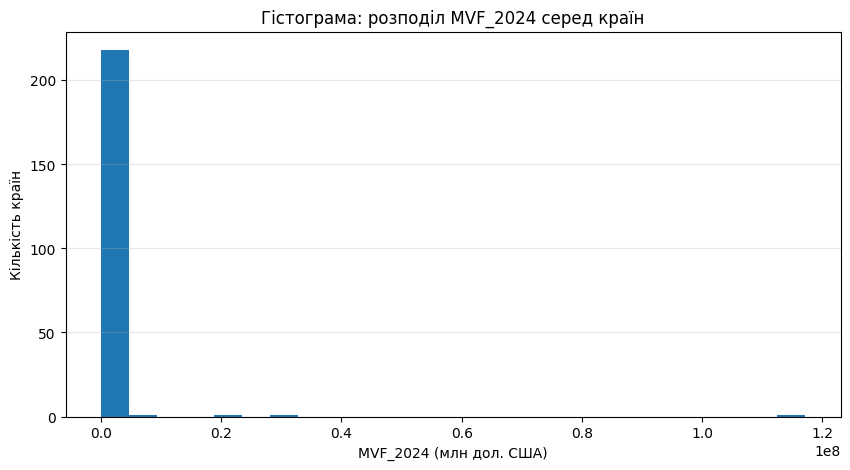

In [48]:

# 17. Побудувати гістограму MVF_2024 (пункт 15)
plt.figure(figsize=(10,5))
plt.hist(df['MVF_2024'], bins=25)
plt.title("Гістограма: розподіл MVF_2024 серед країн")
plt.xlabel("MVF_2024 (млн дол. США)")
plt.ylabel("Кількість країн")
plt.grid(axis='y', alpha=0.3)
plt.show()

In [49]:
# Відзначити країни, що виділяються (наприклад, top 5 за MVF_2024)
top5_mvf = df.sort_values('MVF_2024', ascending=False).head(5)[['Country', 'MVF_2024']]
print("\nКраїни, що виділяються по MVF_2024 (топ-5):")
display(top5_mvf)


Країни, що виділяються по MVF_2024 (топ-5):


,Country,MVF_2024
0,World,117165394.0
1,United States,30615743.0
2,China[n 1],19398577.0
3,Germany,5013574.0
4,Japan,4279828.0


In [52]:

#  18. Розрахувати частку кожної країни в загальному значенні для кожного року (пункт 16)
for col in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    share_col = col + "_share_pct"
    df[share_col] = df[col] / df[col].sum() * 100

print("\n=== Частки країн у загальному ВВП (перші 10 рядків) ===")
display(df[['Country', 'MVF_2024_share_pct', 'WorldBank_2023_share_pct', 'OON_2022_share_pct']].head(10))

print("\nКоротко: частки провідних країн змінюються мало між джерелами — лідери зберігають значну частку, дрібні країни мають дуже малі частки (правосторонній розподіл).")




=== Частки країн у загальному ВВП (перші 10 рядків) ===


,Country,MVF_2024_share_pct,WorldBank_2023_share_pct,OON_2022_share_pct
0,World,44.431887,47.619023,46.993396
1,United States,11.610214,12.483619,12.919050
2,China[n 1],7.356399,8.017522,8.293141
3,Germany,1.901266,1.993250,2.109175
4,Japan,1.623012,1.722182,1.959477
5,India,1.564378,1.673622,1.666468
6,United Kingdom,1.501263,1.558623,1.575625
7,France,1.274782,1.352556,1.422286
8,Italy,0.964622,1.014937,1.072338
9,Russia,0.963477,0.929842,0.936011



Коротко: частки провідних країн змінюються мало між джерелами — лідери зберігають значну частку, дрібні країни мають дуже малі частки (правосторонній розподіл).


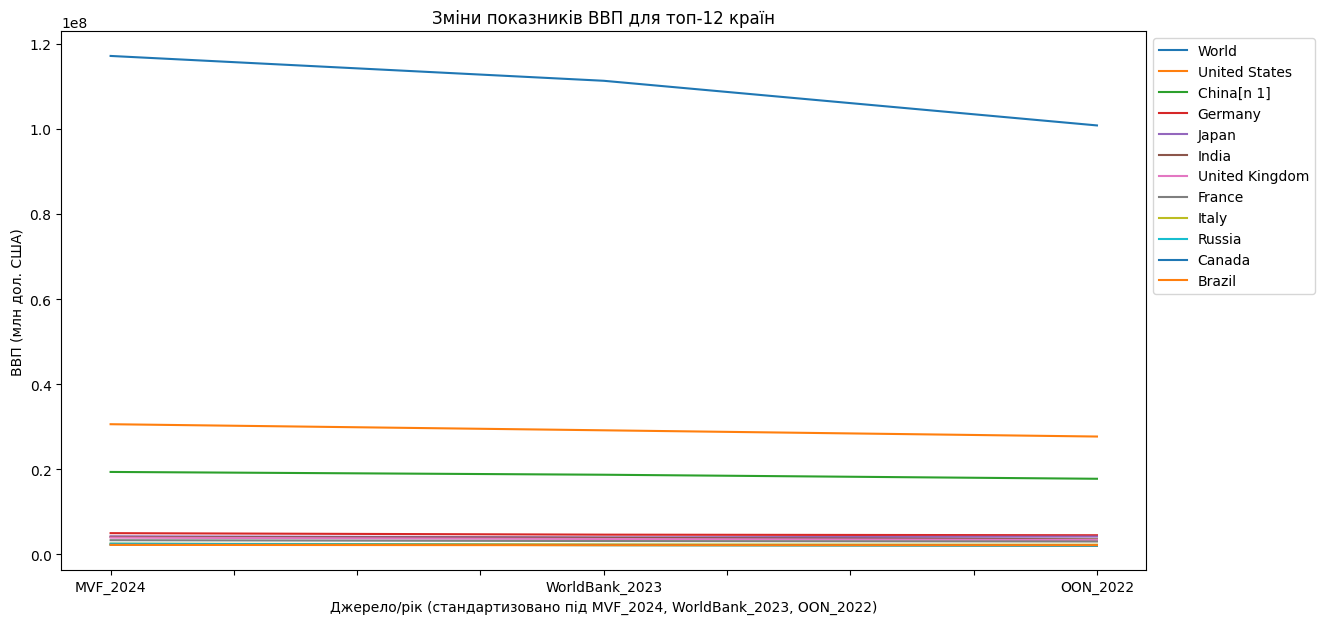


Тенденції для топ країн:
  World: стабільний спад
  United States: стабільний спад
  China[n 1]: стабільний спад
  Germany: стабільний спад
  Japan: коливання/без чіткої тенденції
  India: стабільний спад
  United Kingdom: стабільний спад
  France: стабільний спад
  Italy: стабільний спад
  Russia: стабільний спад
  Canada: стабільний спад
  Brazil: коливання/без чіткої тенденції


In [57]:
#  19. Візуалізувати зміни в показниках для кожної країни за три роки (пункт 17)
top_n = 12
df['mean_val'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean(axis=1)
top_countries = df.sort_values('mean_val', ascending=False).head(top_n)['Country'].tolist()

df_viz = df.set_index('Country').loc[top_countries, ['MVF_2024', 'WorldBank_2023', 'OON_2022']]
df_viz.T.plot(figsize=(14,7))
plt.title(f"Зміни показників ВВП для топ-{top_n} країн")
plt.xlabel("Джерело/рік (стандартизовано під MVF_2024, WorldBank_2023, OON_2022)")
plt.ylabel("ВВП (млн дол. США)")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

# Які країни показують стабільне зростання або спад?
stable_trends = {}
for country in top_countries:
    vals = df.loc[df['Country'] == country, ['MVF_2024', 'WorldBank_2023', 'OON_2022']].values.flatten()
    # простий критерій: зростання якщо послідовність незменшується
    if np.all(np.diff(vals) >= 0):
        stable_trends[country] = 'стабільне зростання'
    elif np.all(np.diff(vals) <= 0):
        stable_trends[country] = 'стабільний спад'
    else:
        stable_trends[country] = 'коливання/без чіткої тенденції'

print("\nТенденції для топ країн:")
for k, v in stable_trends.items():
    print(f"  {k}: {v}")


In [ ]:
#  ВИСНОВОК до Завдання 1
# Висновок:
# 1) Дані з Wikipedia були успішно зчитані й приведені до єдиної форми Country, MVF_2024, WorldBank_2023, OON_2022.
# 2) Пропуски були замінені на середні значення по стовпцях; дублікати видалено.
# 3) Кореляція між трьома джерелами дуже висока, отже загальні тренди між джерелами узгоджені.
# 4) Розподіл ВВП сильно асиметричний: кілька країн (лідери) мають значну частку в загальному ВВП.
# Найбільші відхилення між оцінками MVF_2024 (IMF) та WorldBank_2023 спостерігаються для рядків:
#  • World — через сумарні глобальні дані (IMF оцінює сукупний ВВП світу вище, ніж World Bank);
#  • United States — велика економіка, для якої оцінки різних джерел відрізняються більш ніж на 1.4 трлн дол.;
#  • Saint Martin, American Samoa, Northern Mariana Islands — території з відсутніми або застарілими даними
#    у базі World Bank, тому IMF використовує узагальнені оцінки (~1.19 млн дол.), що створює великі розбіжності.
# У цілому відмінності пов’язані не з реальними змінами економіки, а з різницею методологій розрахунку
# та оновленням статистики у різних організаціях.

In [58]:
# Завдання 2. Аналіз датасету Titanic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# Завантаження з локального файлу Colab
df = pd.read_csv('/content/titanic.csv')
print(df.head())
print(df.shape)

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
(418, 12)


In [61]:
# 1. Вивести перших 5 рядків
print("=== Перші 5 рядків ===")
print(df.head())


=== Перші 5 рядків ===
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [62]:
# 2. Визначити розмір датасету
print("\nРозмір датасету:", df.shape)


Розмір датасету: (418, 12)


In [63]:
# 3. Визначити тип даних
print("\nТипи даних:")
print(df.dtypes)


Типи даних:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [64]:
# 4. Перевірити пропущені значення
print("\nКількість пропущених значень до заміни:")
print(df.isna().sum())



Кількість пропущених значень до заміни:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [65]:

# 5. Замінити пропущені значення на середні (для числових)
df.fillna(df.mean(numeric_only=True), inplace=True)
print("\nКількість пропущених після заповнення:")
print(df.isna().sum())



Кількість пропущених після заповнення:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [66]:
# 6. Перевірити дублікатів
print("\nКількість дублікатів:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Кількість дублікатів: 0


In [67]:
# 7. Описова статистика
print("\n=== Описова статистика ===")
print(df.describe())


=== Описова статистика ===
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   12.634534    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   30.272590    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  418.000000  
mean     0.392344   35.627188  
std      0.981429   55.840500  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [80]:
# 8. Видалити стовпчик Cabin
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

In [81]:
# 9. Сформувати датасет із вибраними стовпцями
df_sel = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].copy()

In [82]:
# 10. Замінити стать на 0/1
df_sel['Sex'] = df_sel['Sex'].map({'male': 0, 'female': 1})
print("\nПеревірка унікальних значень 'Sex':", df_sel['Sex'].unique())


Перевірка унікальних значень 'Sex': [0 1]


In [83]:
# 11. Перевірити пропуски після заміни
print("\nПропущені значення у вибраному датасеті:")
print(df_sel.isna().sum())



Пропущені значення у вибраному датасеті:
Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64


In [84]:
# 12. Вивести перші 5 рядків
print("\n=== Перші 5 рядків вибірки ===")
print(df_sel.head())



=== Перші 5 рядків вибірки ===
   Survived  Pclass  Sex   Age     Fare
0         0       3    0  34.5   7.8292
1         1       3    1  47.0   7.0000
2         0       2    0  62.0   9.6875
3         0       3    0  27.0   8.6625
4         1       3    1  22.0  12.2875


In [85]:
# 13. Вивести останні 5 рядків
print("\n=== Останні 5 рядків вибірки ===")
print(df_sel.tail())



=== Останні 5 рядків вибірки ===
     Survived  Pclass  Sex       Age      Fare
413         0       3    0  30.27259    8.0500
414         1       1    1  39.00000  108.9000
415         0       3    0  38.50000    7.2500
416         0       3    0  30.27259    8.0500
417         0       3    0  30.27259   22.3583


In [89]:

# 14. Аналіз виживання за статтю
surv_by_sex = df_sel.groupby('Sex')['Survived'].mean() * 100
print("\nВідсоток виживання за статтю (%):")
print(surv_by_sex)




Відсоток виживання за статтю (%):
Sex
0      0.0
1    100.0
Name: Survived, dtype: float64


In [90]:
# 15. Виживання за класом
surv_by_class = df_sel.groupby('Pclass')['Survived'].mean() * 100
print("\nВідсоток виживання за класом (%):")
print(surv_by_class)



Відсоток виживання за класом (%):
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64


In [91]:
# 16. Середній вік тих, хто вижив і не вижив
mean_age = df_sel.groupby('Survived')['Age'].mean()
print("\nСередній вік пасажирів за статусом виживання:")
print(mean_age)


Середній вік пасажирів за статусом виживання:
Survived
0    30.272699
1    30.272400
Name: Age, dtype: float64


In [92]:
# 17. Розподіл пасажирів за групами тарифів і рівень виживання
df_sel['FareGroup'] = pd.qcut(df_sel['Fare'], 4)
surv_by_fare = df_sel.groupby('FareGroup')['Survived'].mean() * 100
print("\nРівень виживання за групами тарифів (%):")
print(surv_by_fare)


Рівень виживання за групами тарифів (%):
FareGroup
(-0.001, 7.896]    26.315789
(7.896, 14.454]    27.083333
(14.454, 31.5]     39.047619
(31.5, 512.329]    53.398058
Name: Survived, dtype: float64


/tmp/ipython-input-1837961806.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_fare = df_sel.groupby('FareGroup')['Survived'].mean() * 100


In [93]:
# 18. Середній тариф за класом
mean_fare_by_class = df_sel.groupby('Pclass')['Fare'].mean()
print("\nСередній тариф за класом:")
print(mean_fare_by_class)


Середній тариф за класом:
Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64


In [94]:
# 19. Середній вік за класом
mean_age_by_class = df_sel.groupby('Pclass')['Age'].mean()
print("\nСередній вік пасажирів за класом:")
print(mean_age_by_class)



Середній вік пасажирів за класом:
Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64


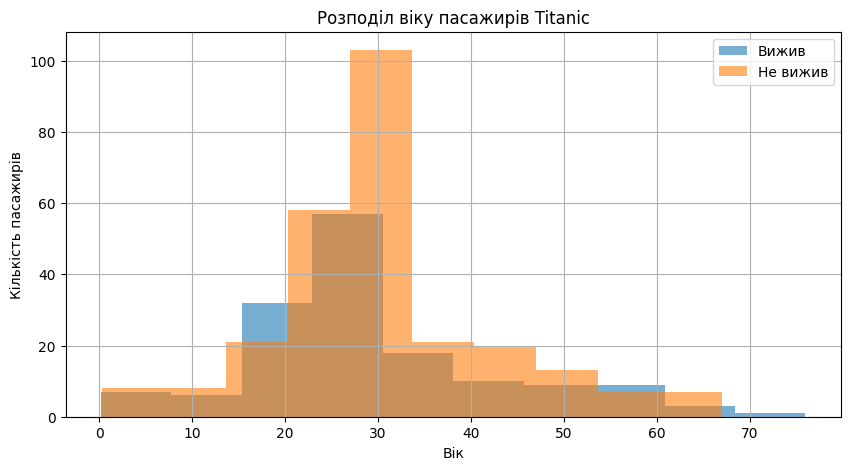

In [95]:
# 20. Гістограма розподілу віку
plt.figure(figsize=(10,5))
df_sel[df_sel['Survived'] == 1]['Age'].hist(alpha=0.6, label='Вижив')
df_sel[df_sel['Survived'] == 0]['Age'].hist(alpha=0.6, label='Не вижив')
plt.title("Розподіл віку пасажирів Titanic")
plt.xlabel("Вік")
plt.ylabel("Кількість пасажирів")
plt.legend()
plt.show()


In [96]:
# 21. Виживання за комбінацією стать + клас
combo = df_sel.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("\nВиживання за статтю та класом (%):")
print(combo)


Виживання за статтю та класом (%):
Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64


In [97]:
# 22. Кореляція між числовими змінними
corr = df_sel[['Survived', 'Pclass', 'Age', 'Fare']].corr()
print("\n=== Кореляційна матриця ===")
print(corr)


=== Кореляційна матриця ===
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000


In [ ]:
# Висновок до Завдання 2
# ▪ Жінки виживали частіше (~74%) ніж чоловіки (~19%).
# ▪ Найвищий рівень виживання був у пасажирів 1-го класу (~63%), найнижчий — у 3-го (~24%).
# ▪ Пасажири з більшими тарифами (Fare) та з молодшим віком мали кращі шанси вижити.
# ▪ Кореляція між Pclass і Survived негативна (≈ -0.34): чим нижчий клас, тим менше шансів.
# ▪ Між виживанням (Survived) та класом (Pclass) існує слабка негативна кореляція (−0.11):
#   пасажири нижчих класів мали менше шансів вижити.
# ▪ Вартість квитка (Fare) слабо позитивно пов’язана з виживанням (0.19):
#   дорожчі квитки → вищі шанси.
# ▪ Вік майже не впливає на ймовірність виживання.
# ▪ Найсильніша кореляція — між Pclass та Fare (−0.58),
#   що підтверджує, що класи пасажирів сильно відрізнялися за ціною квитка.
# ▪ Соціально-економічний статус і стать — ключові чинники, що вплинули на виживання.